<img src="Header.png" alt="Python Cientifico de" style="width: 1000px;"/>

# Resolución de Ecuaciones Diferenciales Ordinarias (EDO)

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

Para integrar EDOs vamos a usar la función `odeint` del paquete `integrate`, que permite integrar sistemas del tipo:

$$ \frac{d\mathbf{y}}{dt}=\mathbf{f}\left(\mathbf{y},t\right)$$

con condiciones iniciales $\mathbf{y}(\mathbf{0}) = \mathbf{y_0}$.

<div class="alert alert-error">**¡Importante!**: La función del sistema recibe como primer argumento $\mathbf{y}$ (un array) y como segundo argumento el instante $t$ (un escalar). Esta convención va exactamente al revés que en MATLAB y si se hace al revés obtendremos errores o, lo que es peor, resultados incorrectos.</div>

In [4]:
from scipy.integrate import solve_ivp

Vamos a integrar primero una EDO elemental, cuya solución ya conocemos:

$$y' + y = 0$$

$$f(y, t) = \frac{dy}{dt} = -y$$

In [5]:
def f(t, y):
    return np.array([-y])

Condiciones iniciales:

In [8]:
y0 = np.array([1])   # Hacemos un arreglo con un dato igual a 1

tini = 0
tfin = 3

In [10]:
print(y0)

[1]


Integramos y representamos la solución:

In [12]:
sol = solve_ivp(f, (tini, tfin), y0)
print(sol)

  message: 'The solver successfully reached the interval end.'
     nfev: 32
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.10001999, 1.03186487, 1.96370974, 2.89555462,
       3.        ])
 t_events: None
        y: array([[1.        , 0.90481933, 0.35660435, 0.14054371, 0.05539061,
        0.04989719]])


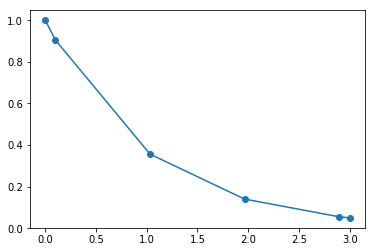

In [11]:
plt.plot(sol.t, sol.y[0, :], 'o-')

la pregunta que surge es ¿cómo se han seleccionado los puntos en los que se calcula la solución?  
El solver los ha calculado por nosotros.  
Si queremos tener control sobre estos puntos, podemos pasar de manera explícita el vector de tiempos:

In [13]:
time = np.linspace(tini, tfin, 30)   # Definimos la variable tiempo

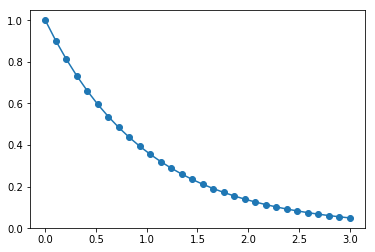

In [14]:
sol_2 = solve_ivp(f, (tini, tfin), y0, t_eval=time)

plt.plot(sol_2.t, sol_2.y[0, :], 'o-')

Probemos a pintar las dos soluciones anteriores, una encima de la otra:

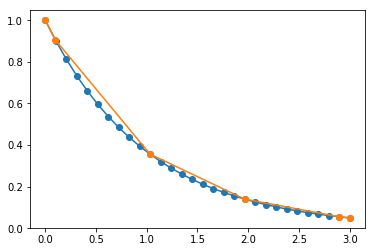

In [15]:
plt.plot(sol_2.t, sol_2.y[0, :], 'o-')
plt.plot(sol.t, sol.y[0, :], 'o-')

Podemos observar que a pesar de que en la primera se han usado muchos menos puntos, aquellos en los que se ha calculado la solución coinciden con el segundo resultado. Esto se debe a que, en realidad, el solver siempre da los pasos que considere necesarios para calcular la solución, pero sólo guarda los que nosotros le indicamos. Esto lo podemos ver del siguiente modo:

In [24]:
print(f"function evaluations in sol 1: {sol.nfev}")
print(f"function evaluations in sol 2: {sol_2.nfev}")

function evaluations in sol 1: 32
function evaluations in sol 2: 32


Para ello podemos usar la salida densa `dense_output = True` para obtener la solución en un punto cualquiera:

In [25]:
sol_3 = solve_ivp(f, (tini, tfin), y0, dense_output=True)

In [27]:
sol_3.sol(1.0)

array([0.36814005])

In [28]:
t = np.linspace(tini, tfin, 45)
y = sol_3.sol(t)

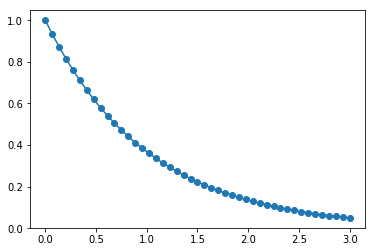

In [29]:
plt.plot(t, y[0, :], 'o-')

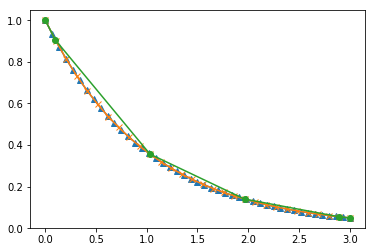

In [30]:
plt.plot(t, y[0, :], '^-')
plt.plot(sol_2.t, sol_2.y[0, :], 'x-')
plt.plot(sol.t, sol.y[0, :], 'o-')

### EDOs de orden superior

Tendremos que acordarnos ahora de cómo reducir las ecuaciones de orden. De nuevo, vamos a probar con un ejemplo académico:

$$y + y'' = 0$$

definimos $\mathbf{y} \leftarrow \pmatrix{y \\ y'}$

$$\mathbf{f}(\mathbf{y}) = \frac{d\mathbf{y}}{dt} =  \pmatrix{y \\ y'}' = \pmatrix{y' \\ y''} = \pmatrix{y' \\ -y}$$

In [33]:
def f(t, y):
    return np.array([y[1], -y[0]])

In [39]:
t0 = 0
t1 = 10

t = np.linspace(t0, t1)   # por default son 50 pasos
y0 = np.array([1.0, 0.0])

In [40]:
print(y0)

[1. 0.]


In [41]:
sol = solve_ivp(f, (t0, t1), y0, t_eval=t)

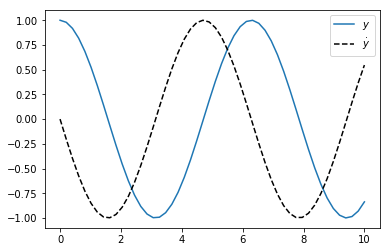

In [42]:
plt.plot(t, sol.y[0, :], label='$y$')
plt.plot(t, sol.y[1, :], '--k', label='$\dot{y}$')
plt.legend()